 导入包

In [1]:
import torch
import numpy as np
import random
from torch.utils.data import  Dataset
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

全局变量

In [2]:
batch_size=512
lr  = 0.01
epoch_num = 20
num_workers=0

构造数据集

In [3]:
random.seed(42)
torch.manual_seed(42)
class MultiDataSet(Dataset):
    def __init__(self, root, train=True, transform=None, download=True):
        self.mnist = torchvision.datasets.MNIST(root=root, train=train, download=download, transform=transform)
        self.targets = torch.eye(10)[self.mnist.targets]

    def __getitem__(self, index):
        image, target = self.mnist[index]
        processed_target = self.targets[index]
        return image, processed_target, target

    def __len__(self):
        return len(self.mnist)

mnist_train = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=True,
                                    download=True, transform=transforms.ToTensor())
mnist_test = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=False,
                                   download=True, transform=transforms.ToTensor())
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=num_workers)

定义激活函数 定义网络结构 定义网络初始化参数

In [4]:
inputs = 784
hiddens = 256
out = 10
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(inputs,hiddens)
        self.relu = torch.nn.ReLU()
        self.hidden = torch.nn.Linear(hiddens,out)
        self.softmax = torch.nn.Softmax(dim=1)
    def forward(self,x):
        x = x.view(x.size(0), -1)
        t = self.linear(x)
        t = self.relu(t)
        t = self.hidden(t)
        t = self.softmax (t)
        return  t


loss =  torch.nn.CrossEntropyLoss()


训练

In [5]:

import time
train_loss_0 =[]
test_loss_0 = []
train_acc_0=[]
test_acc_0= []
start_time = time.time()
net0 = Net().to(device)
lambda_0 = 0
opt0 = torch.optim.Adam(params=net0.parameters(),lr=lr)
for epoch in range(epoch_num):
    loss_list=[]
    acc_list=[]
    for data in train_iter:

        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net0(x.to(device))
        l = loss(y_hat,y.to(device))
        l2_regularization = 0
        for param in net0.parameters():
            l2_regularization += torch.norm(param, 2)
        l += lambda_0*l2_regularization
        opt0.zero_grad()
        l.backward()
        opt0.step()
        y_index = torch.argmax(y_hat, dim=1)
        loss_list.append(l.item())
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))

    train_loss_mean = np.mean(loss_list)
    train_acc_mean = np.mean(acc_list)
    train_loss_0.append(train_loss_mean)
    train_acc_0.append(train_acc_mean)
    loss_list=[]
    acc_list=[]
    for data in test_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net0(x.to(device))
        l = loss(y_hat,y.to(device))
        loss_list.append(l.item())
        y_index = torch.argmax(y_hat, dim=1)
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))


    test_loss_mean = np.mean(loss_list)
    test_acc_mean = np.mean(acc_list)
    test_loss_0.append(test_loss_mean)
    test_acc_0.append(test_acc_mean)
    print("epoch:",epoch+1,"\n",
          "train_loss:",train_loss_mean,"train_acc:",train_acc_mean,
          "\n",
          "test_loss:",test_loss_mean,"test_acc:",test_acc_mean
          )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 
 train_loss: 1.5935299090850048 train_acc: 0.874732905982906 
 test_loss: 1.5306896096781681 test_acc: 0.9320518092105263
epoch: 2 
 train_loss: 1.514737583633162 train_acc: 0.9482672275641025 
 test_loss: 1.5037345321554887 test_acc: 0.9585731907894737
epoch: 3 
 train_loss: 1.500371501995967 train_acc: 0.9619557959401709 
 test_loss: 1.4931686614689075 test_acc: 0.9692639802631579
epoch: 4 
 train_loss: 1.4925999590474317 train_acc: 0.9692341079059829 
 test_loss: 1.4901583696666516 test_acc: 0.9720394736842105
epoch: 5 
 train_loss: 1.4880536020311534 train_acc: 0.9737246260683761 
 test_loss: 1.4894122387233533 test_acc: 0.9722450657894737
epoch: 6 
 train_loss: 1.4847670864855123 train_acc: 0.9769631410256411 
 test_loss: 1.490722750362597 test_acc: 0.971422697368421
epoch: 7 
 train_loss: 1.4829669212683654 train_acc: 0.9787159455128205 
 test_loss: 1.4926740370298688 test_acc: 0.9692639802631579
epoch: 8 
 train_loss: 1.4817619802605393 train_acc: 0.9797676282051282 
 

In [6]:
lambda_1  = 0.01


import time
train_loss_1 =[]
test_loss_1 = []
train_acc_1=[]
test_acc_1= []
start_time = time.time()
net1 = Net().to(device)
opt1 = torch.optim.Adam(params=net1.parameters(),lr=lr)
for epoch in range(epoch_num):
    loss_list=[]
    acc_list=[]
    for data in train_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net1(x.to(device))
        l = loss(y_hat,y.to(device))
         # 计算L2正则化项
        l2_regularization = 0
        for param in net1.parameters():
            l2_regularization += torch.norm(param, 2)
        l += lambda_1*l2_regularization
        opt1.zero_grad()
        l.backward()
        opt1.step()

        y_index = torch.argmax(y_hat, dim=1)
        loss_list.append(l.item())
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))

    train_loss_mean = np.mean(loss_list)
    train_acc_mean = np.mean(acc_list)
    train_loss_1.append(train_loss_mean)
    train_acc_1.append(train_acc_mean)
    loss_list=[]
    acc_list=[]
    for data in test_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net1(x.to(device))
        l = loss(y_hat,y.to(device))
        loss_list.append(l.item())
        y_index = torch.argmax(y_hat, dim=1)
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))


    test_loss_mean = np.mean(loss_list)
    test_acc_mean = np.mean(acc_list)
    test_loss_1.append(test_loss_mean)
    test_acc_1.append(test_acc_mean)
    print("epoch:",epoch+1,"\n",
          "train_loss:",train_loss_mean,"train_acc:",train_acc_mean,
          "\n",
          "test_loss:",test_loss_mean,"test_acc:",test_acc_mean
          )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 
 train_loss: 1.7810295789669721 train_acc: 0.8583900908119658 
 test_loss: 1.5567826722797595 test_acc: 0.926500822368421
epoch: 2 
 train_loss: 1.7174069127465925 train_acc: 0.9250300480769231 
 test_loss: 1.539141203227796 test_acc: 0.9404810855263158
epoch: 3 
 train_loss: 1.708747237156599 train_acc: 0.934395032051282 
 test_loss: 1.5408166395990472 test_acc: 0.940686677631579
epoch: 4 
 train_loss: 1.7063197447703435 train_acc: 0.9388187767094017 
 test_loss: 1.5361526388871043 test_acc: 0.9443873355263158
epoch: 5 
 train_loss: 1.7035667488717625 train_acc: 0.9396534455128205 
 test_loss: 1.5373316187607615 test_acc: 0.9431537828947368
epoch: 6 
 train_loss: 1.6990871765674689 train_acc: 0.9420572916666666 
 test_loss: 1.5296773157621686 test_acc: 0.953125
epoch: 7 
 train_loss: 1.6964931080483983 train_acc: 0.9445946848290598 
 test_loss: 1.5295354943526418 test_acc: 0.9520970394736842
epoch: 8 
 train_loss: 1.6975724890700772 train_acc: 0.9432759081196581 
 test_loss:

In [7]:
lambda_2 = 0.05



import time

train_loss_2 =[]
test_loss_2 = []
train_acc_2=[]
test_acc_2= []
start_time = time.time()
net2 = Net().to(device)
opt2 = torch.optim.Adam(params=net2.parameters(),lr=lr)
for epoch in range(epoch_num):
    loss_list=[]
    acc_list=[]
    for data in train_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net2(x.to(device))
        l = loss(y_hat,y.to(device))
        l2_regularization = 0
        for param in net1.parameters():
            l2_regularization += torch.norm(param, 2)
        l += 0.05*l2_regularization
        opt2.zero_grad()
        l.backward()
        opt2.step()
        y_index = torch.argmax(y_hat, dim=1)
        loss_list.append(l.item())
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))

    train_loss_mean = np.mean(loss_list)
    train_acc_mean = np.mean(acc_list)
    train_loss_2.append(train_loss_mean)
    train_acc_2.append(train_acc_mean)
    loss_list=[]
    acc_list=[]
    for data in test_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net2(x.to(device))
        l = loss(y_hat,y.to(device))

        loss_list.append(l.item())
        y_index = torch.argmax(y_hat, dim=1)
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))


    test_loss_mean = np.mean(loss_list)
    test_acc_mean = np.mean(acc_list)
    test_loss_2.append(test_loss_mean)
    test_acc_2.append(test_acc_mean)
    print("epoch:",epoch+1,"\n",
          "train_loss:",train_loss_mean,"train_acc:",train_acc_mean,
          "\n",
          "test_loss:",test_loss_mean,"test_acc:",test_acc_mean
          )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 
 train_loss: 2.3397925613272905 train_acc: 0.887520032051282 
 test_loss: 1.5199812462455349 test_acc: 0.9429481907894737
epoch: 2 
 train_loss: 2.2720931269164777 train_acc: 0.9466980502136753 
 test_loss: 1.5051796059859426 test_acc: 0.9575452302631579
epoch: 3 
 train_loss: 2.2577896423828907 train_acc: 0.9610209668803419 
 test_loss: 1.497748236907156 test_acc: 0.9647409539473685
epoch: 4 
 train_loss: 2.2498027850420046 train_acc: 0.9687166132478633 
 test_loss: 1.4908429760681956 test_acc: 0.9715254934210527
epoch: 5 
 train_loss: 2.244817503497132 train_acc: 0.9735076121794872 
 test_loss: 1.4940102100372314 test_acc: 0.9683388157894737
epoch: 6 
 train_loss: 2.242244237508529 train_acc: 0.9758613782051282 
 test_loss: 1.489047558684098 test_acc: 0.9727590460526315
epoch: 7 
 train_loss: 2.2398192638005967 train_acc: 0.9782151442307693 
 test_loss: 1.4877131361710398 test_acc: 0.9732730263157895
epoch: 8 
 train_loss: 2.2378210532359586 train_acc: 0.9800681089743589 
 

模型评估
- 当lambda= 0（无正则化）时，模型在训练集上表现得最好，准确率最高。然而，需要注意这种情况下模型可能会更容易发生过拟合。
- 当lambda的值逐渐增加（0.01和0.05），模型的初始准确率下降，说明正则化有一定程度上的影响。这是因为正则化惩罚了模型中权重的大小，使得权重更趋向于较小的值，有助于防止过拟合。
- 在较大的lambda（如0.05）情况下，模型的准确率相对较低，这表明过强的正则化可能会导致欠拟合

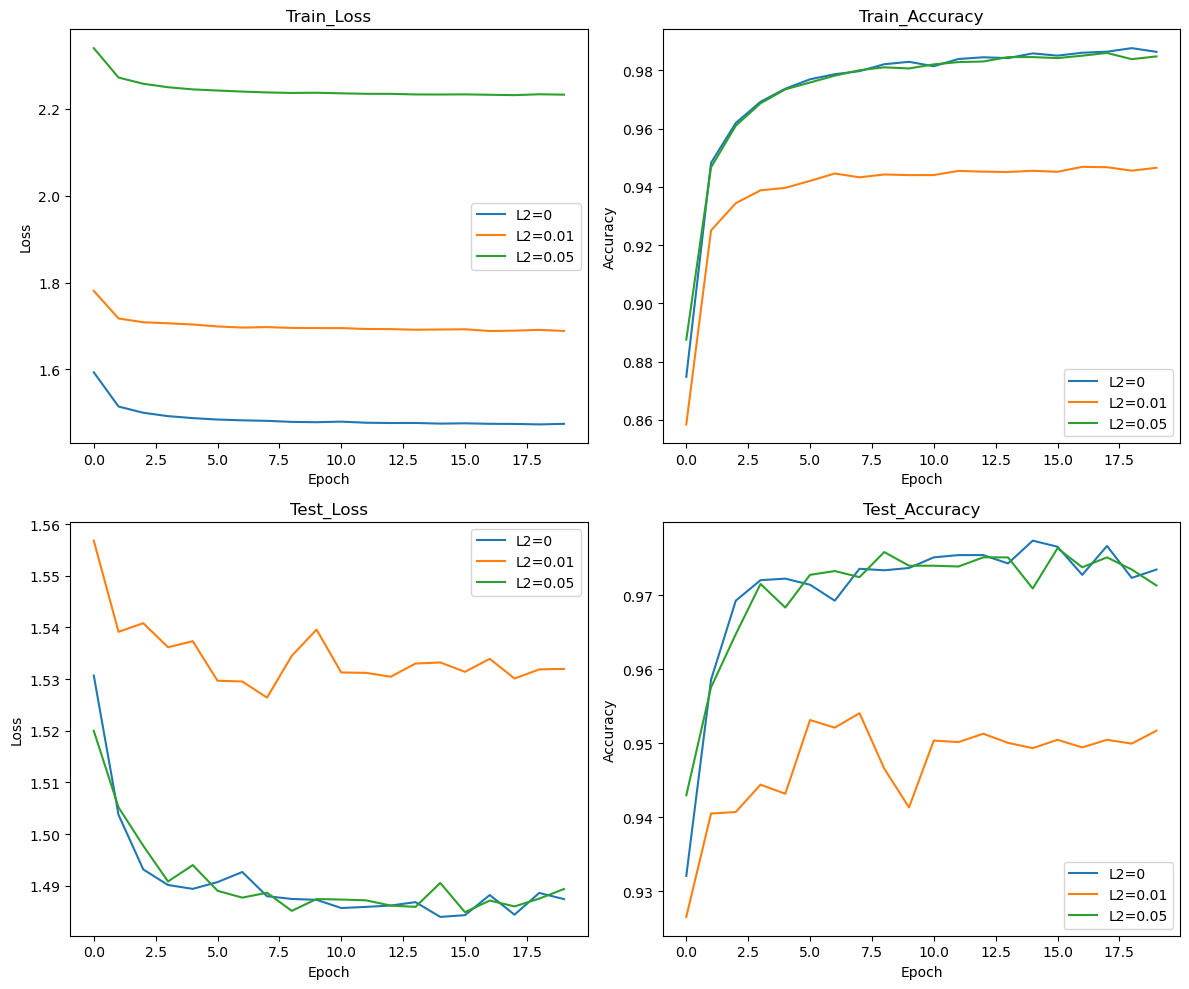

In [9]:
# 示例数据
train_loss = [train_loss_0, train_loss_1, train_loss_2]
test_loss = [test_loss_0, test_loss_1, test_loss_2]
train_acc = [train_acc_0, train_acc_1, train_acc_2]
test_acc = [test_acc_0, test_acc_1, test_acc_2]
titles_loss = ['Train_Loss', 'Test_Loss']
titles_acc = ['Train_Accuracy', 'Test_Accuracy']
labels = ['L2=0', 'L2=0.01', 'L2=0.05']

# 创建2x2的图，并添加脚标
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 绘制Train_Loss和Test_Loss
for i in range(3):
    ax_train_loss = axes[0, 0]
    ax_train_loss.plot(train_loss[i], label=f'{labels[i]}')

    ax_test_loss = axes[1, 0]
    ax_test_loss.plot(test_loss[i], label=f'{labels[i]}')

# 绘制Train_Accuracy和Test_Accuracy
for i in range(3):
    ax_train_acc = axes[0, 1]
    ax_train_acc.plot(train_acc[i], label=f'{labels[i]}')

    ax_test_acc = axes[1, 1]
    ax_test_acc.plot(test_acc[i], label=f'{labels[i]}')

# 设置标题和标签
for ax in axes.flat:
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss' if ax in [axes[0, 0], axes[1, 0]] else 'Accuracy')

axes[0, 0].set_title(titles_loss[0])
axes[0, 0].legend()

axes[1, 0].set_title(titles_loss[1])
axes[1, 0].legend()

axes[0, 1].set_title(titles_acc[0])
axes[0, 1].legend()

axes[1, 1].set_title(titles_acc[1])
axes[1, 1].legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()
